### Es 1
Hai a disposizione un file `data.csv` contenente dati mensili di passeggeri con due colonne:

- `date`: data in formato `YYYY-MM` (mese/anno)
- `passengers`: numero di passeggeri per quel mese


Costruisci un modello di **regressione polinomiale** che approssima l’andamento del numero di passeggeri nel tempo.

1. Carica il dataset.
2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
3. Applica una regressione polinomiale (grado a tua scelta).
4. Calcola l’RMSE tra i valori reali e quelli predetti.
5. Visualizza i dati reali e la curva stimata con Plotly.

In [4]:
# 1. Carica il dataset.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("dataPassengers.csv")
print(df.head())


      date  passengers
0  1949-01       112.0
1  1949-02       118.0
2  1949-03       132.0
3  1949-04       129.0
4  1949-05       121.0


In [12]:
# 2. Convertilo in un formato numerico utilizzando una colonna `mese_numerico` che conti i mesi a partire da gennaio 1949.
from datetime import datetime

# Convert date to datetime 
df['date'] = pd.to_datetime(df['date'])

# Calculate months since Jan 1949
start_date = pd.to_datetime('1949-01')
df['mese_numerico'] = ((df['date'].dt.year - start_date.year) * 12 + 
					   (df['date'].dt.month - start_date.month) + 1)

print(df.head())

        date  passengers  mese_numerico
0 1949-01-01       112.0              1
1 1949-02-01       118.0              2
2 1949-03-01       132.0              3
3 1949-04-01       129.0              4
4 1949-05-01       121.0              5


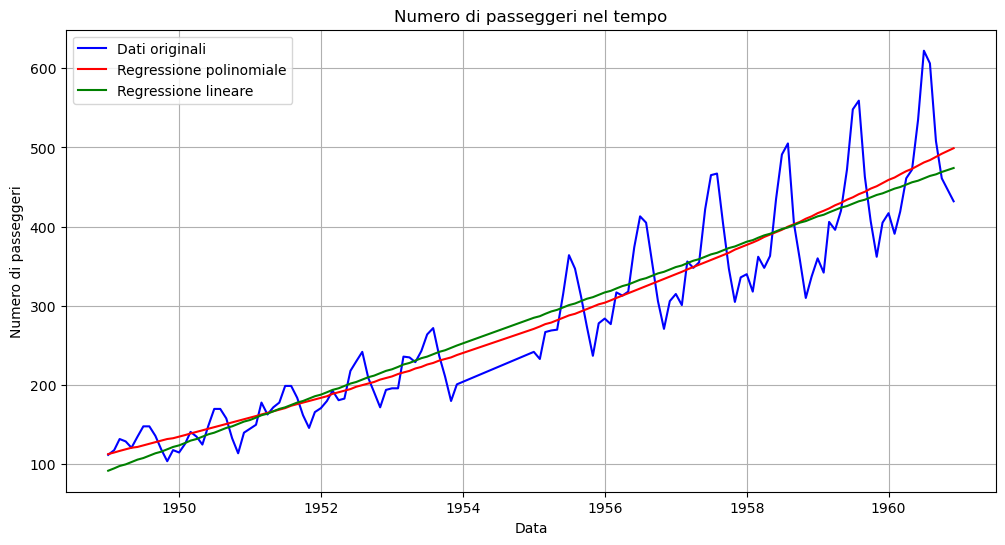

In [37]:
# 3. Applica una regressione polinomiale (grado a tua scelta).
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import numpy as np

# Rimuovi i valori NaN
df_clean = df.dropna()




model_poly = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())

model_poly.fit(df_clean[['mese_numerico']], df_clean['passengers'])


y_pred_poly = model_poly.predict(df[['mese_numerico']])
y_pred_poly = np.maximum(0, np.round(y_pred_poly)).astype(int)


model_linear = LinearRegression()
model_linear.fit(df_clean[['mese_numerico']], df_clean['passengers'])
y_pred_linear = model_linear.predict(df[['mese_numerico']])
y_pred_linear = np.maximum(0, np.round(y_pred_linear)).astype(int)
# 4. Visualizza i risultati.
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['passengers'], label='Dati originali', color='blue')
plt.plot(df['date'], y_pred_poly, label='Regressione polinomiale', color='red')
plt.plot(df['date'], y_pred_linear, label='Regressione lineare', color='green')
plt.title('Numero di passeggeri nel tempo')
plt.xlabel('Data')
plt.ylabel('Numero di passeggeri')
plt.legend()
plt.grid()
plt.show()


In [43]:
# 4. Calcola l’RMSE tra i valori reali e quelli predetti.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import root_mean_squared_error

rmse_linear = root_mean_squared_error(df_clean['passengers'], y_pred_linear)
rmse_poly2 =  root_mean_squared_error(df_clean['passengers'], y_pred_poly)

print(f"RMSE Regressione lineare: {rmse_linear}")
print(f"RMSE Regressione polinomiale: {rmse_poly2}")


RMSE Regressione lineare: 45.67701077103337
RMSE Regressione polinomiale: 44.4413156235405


In [48]:
# 5. Visualizza i dati reali e la curva stimata con Plotly.
import plotly.express as px
df['y_pred_poly'] = y_pred_poly
df['y_pred_linear'] = y_pred_linear
fig = px.line(df, x='date', y=['passengers', 'y_pred_poly', 'y_pred_linear'],
              labels={'value': 'Numero di passeggeri'},
              title='Numero di passeggeri nel tempo con regressione polinomiale e lineare')
fig.update_traces(mode='lines+markers')
fig.show()

### Es2. 
Costruisci una web app con Dash che permette all’utente di scegliere il grado del polinomio per adattare un modello di regressione ai dati non lineari e vedere il risultato aggiornarsi dinamicamente.


1. Genera 100 punti x tra -3 e 3.

2. Calcola ad esempio y = x³ - x + rumore.

3. Costruisci un'interfaccia Dash con:
    - uno slider per scegliere il grado del polinomio (1–10),
    - un grafico Plotly che mostra i dati e la curva stimata.

4. Usa PolynomialFeatures + LinearRegression da scikit-learn per stimare la curva

In [1]:
# 1. Genera 100 punti x tra -3 e 3.
import numpy as np
x = np.linspace(-3, 3, 100)
print(x[:10])


[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545]


In [2]:
# 2. Calcola ad esempio y = x³ - x + rumore.
noise = np.random.normal(0, 0.5, x.shape)
y = x**3 - x + noise
print(y[:10])

[-24.24180054 -22.48372035 -21.14082103 -19.60225093 -18.93917184
 -17.22650243 -15.70205388 -13.81166007 -13.4847632  -11.96406897]


In [ ]:
# 3. Costruisci un'interfaccia Dash con:
#     - uno slider per scegliere il grado del polinomio (1–10),
#     - un grafico Plotly che mostra i dati e la curva stimata.
import dash                      
from dash import dcc, html      
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd  

# Inizializza app
app = dash.Dash(__name__) 

app.layout = html.Div([
    html.H3("Seleziona grado polinomio"), 
    dcc.Slider(
        id='grado',       
        min=1,
        max=10,
        step=1,
        value=1,                  
        marks={i: str(i) for i in range(1, 11)}  
    ),

    html.Div(id='grafico', style={'margin-top': '1hv'}),  
])

@app.callback(
    Output('grafico', 'children'),    
    Input('grado', 'value')    
    
)
def grafico(grado):
    coeff = np.polyfit(x, y, grado)
    
    p = np.poly1d(coeff)
    
    y_pred = p(x)
    
    fig = px.scatter(x=x, y=y, title=f'Polinomio di grado {grado}')
    fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name='Curva stimata'))
    
    return dcc.Graph(figure=fig)
if __name__ == '__main__':
    app.run(debug=True)

NameError: name 'dash' is not defined